In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
sb.set()
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
filteredanime_data = pd.read_csv("filtered-anime-data.csv")

**Top 15 Studio**

In [3]:
studios = filteredanime_data["Studio"].value_counts()
top_15_studios = studios.head(15)
top_15_studios = list(top_15_studios.to_dict())
top_15_studios

#Only keep top 15 studios
filteredanime_data_studios = filteredanime_data.loc[filteredanime_data["Studio"].isin(top_15_studios)]
studio_dict = {k: v for v, k in enumerate(top_15_studios)}
filteredanime_data_studios["Studio"] = filteredanime_data_studios["Studio"].map(studio_dict).astype(np.int8)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Studio names were change to numeric values to be used as predictors for Decision Tree

In [4]:
filteredanime_data_studios

,Unnamed: 0,Type,Studio,Tags,Rating,Release_year
1,1,TV,2,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0
2,3,TV,13,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0
8,9,TV,8,"Shounen, Sports, Animeism, School Club, School...",4.53,2016.0
10,11,TV,8,"Shounen, Sports, School Club, School Life, Tou...",4.51,2015.0
12,13,TV,3,"Action, Adventure, Drama, Fantasy, Shounen, Mo...",4.51,2011.0
...,...,...,...,...,...,...
6020,15184,TV,14,"Comedy, Fantasy, Harem, Breaking the Fourth Wa...",2.34,2018.0
6023,15195,TV,4,"Comedy, Horror, Mystery, Chibi, Gag, Monsters,...",2.32,2016.0
6029,15217,TV,9,"Slice of Life, Music, Showbiz, Based on an Oto...",2.28,2017.0
6037,15282,Movie,4,"Horror, Mystery, Countryside, Monsters, Based ...",2.15,2017.0


**Rating**

In [5]:
ratings = ["Poor (0, 3.29]", "Below Average (3.29 - 3.46]", "Average (3.46 - 3.62]", "Above Average (3.62, 3.84]", "Good (3.84, 5.0]"]
filteredanime_data_studios["Rating Category"] = pd.cut(x = filteredanime_data_studios.Rating, bins = [0, 3, 3.3, 3.6, 4, 5], labels = ratings)
ratings = ["Poor (0, 3]", "Below Average (3 - 3.3]", "Average (3.3 - 3.6]", "Above Average (3.6, 4]", "Good (4, 5.0]"]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ratings are converted to categorical data by grouping a range of ratings together

In [6]:
filteredanime_data_studios = filteredanime_data_studios[['Studio', 'Rating Category']].copy()
print(filteredanime_data_studios.head())

    Studio   Rating Category
1        2  Good (3.84, 5.0]
2       13  Good (3.84, 5.0]
8        8  Good (3.84, 5.0]
10       8  Good (3.84, 5.0]
12       3  Good (3.84, 5.0]


In [7]:
filteredanime_data_studios

,Studio,Rating Category
1,2,"Good (3.84, 5.0]"
2,13,"Good (3.84, 5.0]"
8,8,"Good (3.84, 5.0]"
10,8,"Good (3.84, 5.0]"
12,3,"Good (3.84, 5.0]"
...,...,...
6020,14,"Poor (0, 3.29]"
6023,4,"Poor (0, 3.29]"
6029,9,"Poor (0, 3.29]"
6037,4,"Poor (0, 3.29]"


**Studio against Rating**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.43018867924528303

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3641509433962264



<AxesSubplot:>

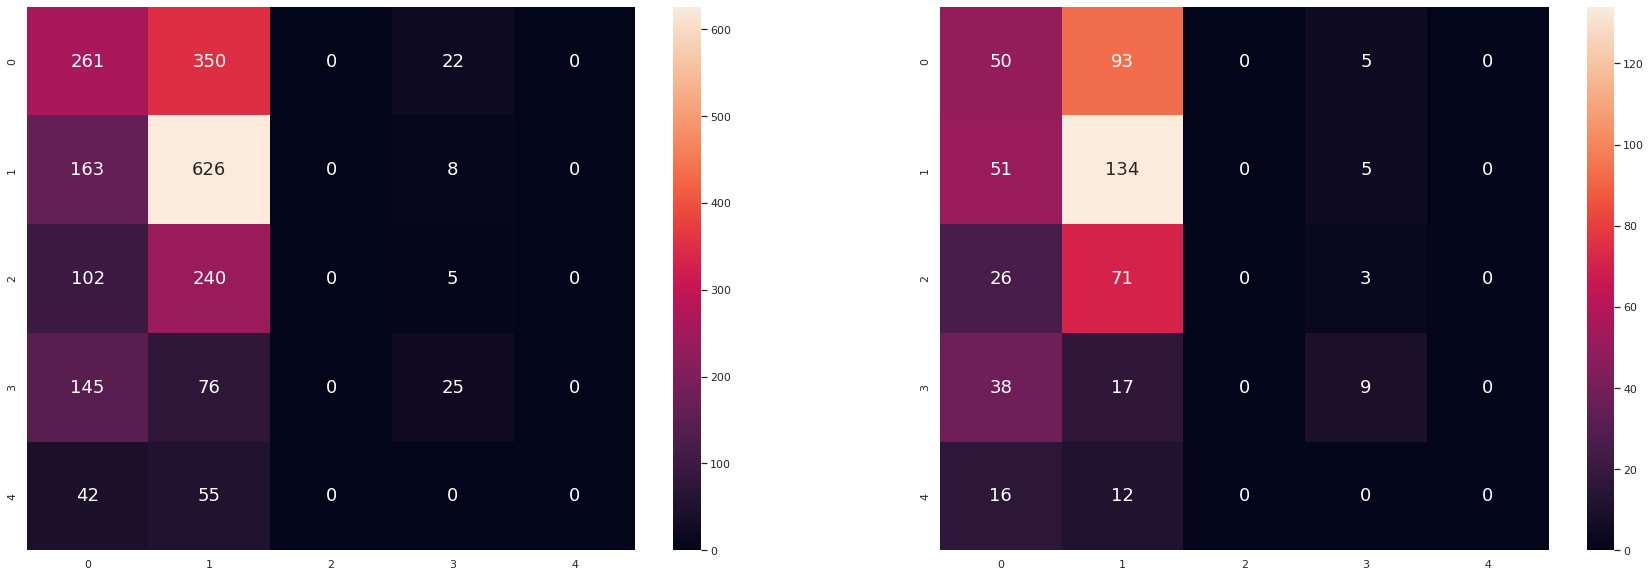

In [8]:
top_15_rating_tree = pd.DataFrame(filteredanime_data_studios['Rating Category'])
top_15_studio_tree = pd.DataFrame(filteredanime_data_studios['Studio'])
top_15_rating_train, top_15_rating_test, top_15_studio_train, top_15_studio_test = train_test_split(top_15_rating_tree, top_15_studio_tree, test_size = 0.2)

dectree_studios = DecisionTreeClassifier(max_depth = 6)
dectree_studios.fit(top_15_studio_train, top_15_rating_train)

top_15_rating_train_pred = dectree_studios.predict(top_15_studio_train)
top_15_rating_test_pred = dectree_studios.predict(top_15_studio_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree_studios.score(top_15_studio_train, top_15_rating_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree_studios.score(top_15_studio_test, top_15_rating_test))
print()

f, axes = plt.subplots(1, 2, figsize=(30, 10))
sb.heatmap(confusion_matrix(top_15_rating_train, top_15_rating_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(top_15_rating_test, top_15_rating_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5483870967741935, 0.9285714285714286, 'Studio <= 0.0\ngini = 1.0\nsamples = 2120\nvalue = [633, 797, 347, 246, 97]\nclass = Below Average (3 - 3.3]'),
 Text(0.4838709677419355, 0.7857142857142857, 'gini = 1.0\nsamples = 404\nvalue = [95, 192, 85, 15, 17]\nclass = Below Average (3 - 3.3]'),
 Text(0.6129032258064516, 0.7857142857142857, 'Studio <= 10.0\ngini = 1.0\nsamples = 1716\nvalue = [538, 605, 262, 231, 80]\nclass = Below Average (3 - 3.3]'),
 Text(0.4838709677419355, 0.6428571428571429, 'Studio <= 10.0\ngini = 1.0\nsamples = 1419\nvalue = [432, 531, 211, 180, 65]\nclass = Below Average (3 - 3.3]'),
 Text(0.41935483870967744, 0.5, 'Studio <= 8.0\ngini = 1.0\nsamples = 1306\nvalue = [414, 472, 180, 178, 62]\nclass = Below Average (3 - 3.3]'),
 Text(0.25806451612903225, 0.35714285714285715, 'Studio <= 6.0\ngini = 1.0\nsamples = 1081\nvalue = [334, 414, 156, 127, 50]\nclass = Below Average (3 - 3.3]'),
 Text(0.12903225806451613, 0.21428571428571427, 'Studio <= 2.0\ngini = 1.0\

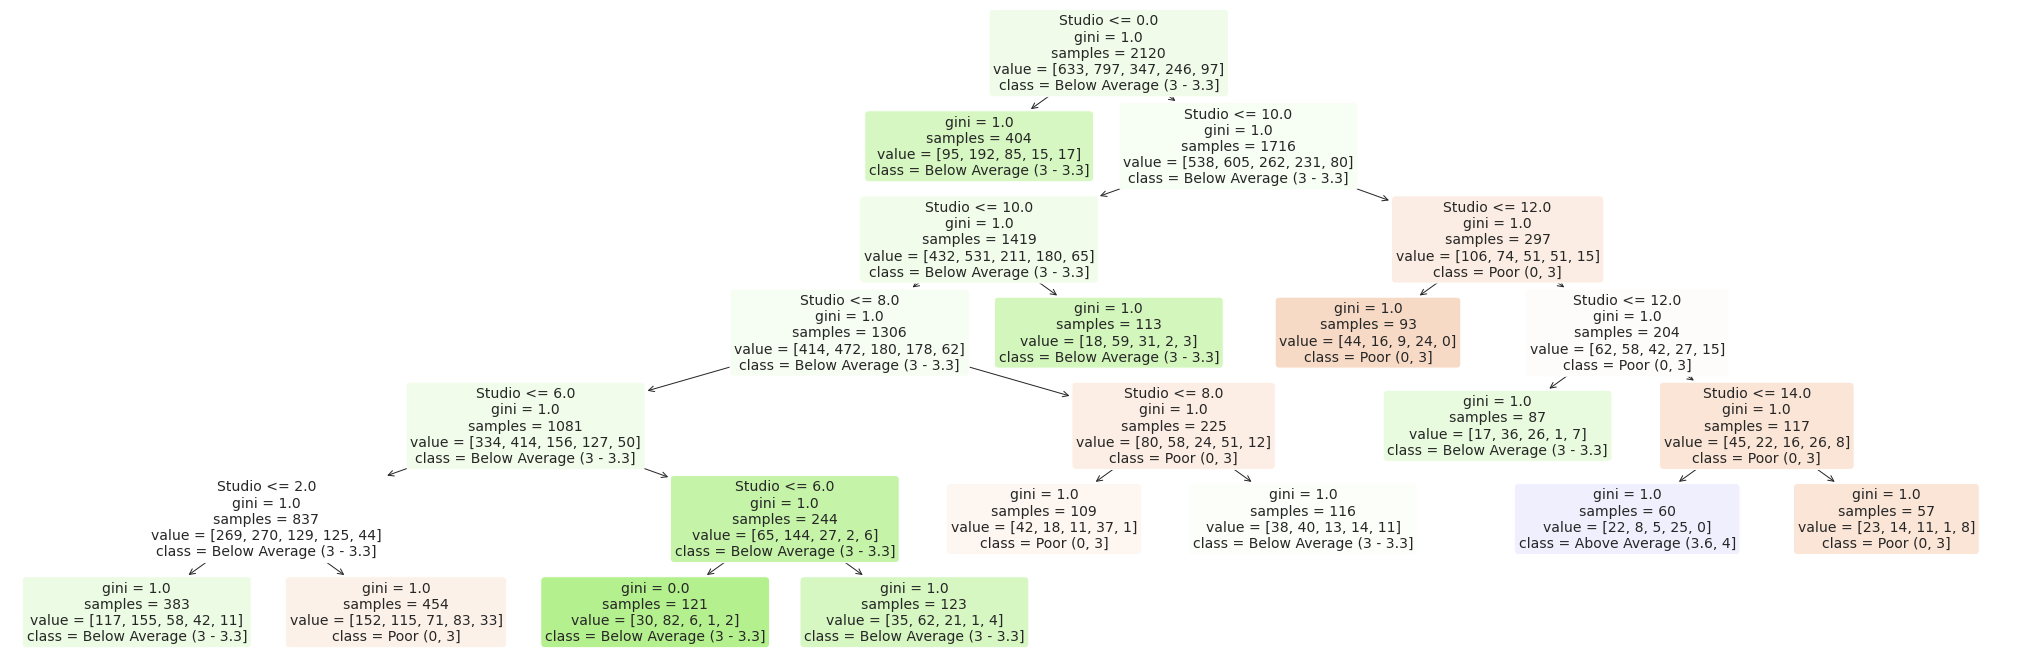

In [9]:
f = plt.figure(figsize=(36,12))
#added precision to round off the number
plot_tree(dectree_studios, filled=True, rounded=True,precision=0, 
          feature_names=["Studio"], 
          class_names=["Poor (0, 3]", "Below Average (3 - 3.3]", "Average (3.3 - 3.6]", "Above Average (3.6, 4]", "Good (4, 5.0]"])

In [10]:
accuracy_train = [['Studio', dectree_studios.score(top_15_studio_train, top_15_rating_train)]]
accuracy_train_scores_studios = pd.DataFrame(accuracy_train, columns = ['Category', 'Accuracy Score'])
accuracy_train_scores_studios

,Category,Accuracy Score
0,Studio,0.430189


In [11]:
accuracy_test = [['Studio', dectree_studios.score(top_15_studio_test, top_15_rating_test)]]
accuracy_test_scores_studios = pd.DataFrame(accuracy_test, columns = ['Category', 'Accuracy Score'])
accuracy_test_scores_studios

,Category,Accuracy Score
0,Studio,0.364151


**Top 15 Genres**

In [12]:
genres = filteredanime_data.Tags.str.split(', ',expand=True).stack().value_counts()
top_15_genres = genres.head(15)
top_15_genres = top_15_genres.to_dict()
top_15_genres = list(top_15_genres.keys())
top_15_genres

['Based on a Manga',
 'Comedy',
 'Action',
 'Fantasy',
 'Sci Fi',
 'Shounen',
 'Original Work',
 'Adventure',
 'Drama',
 'Family Friendly',
 'Non-Human Protagonists',
 'School Life',
 'Romance',
 'Short Episodes',
 'Slice of Life']

In [13]:
filteredanime_data_genres = filteredanime_data.copy()
filteredanime_data_genres

,Unnamed: 0,Type,Studio,Tags,Rating,Release_year
0,0,TV,ufotable,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0
1,1,TV,TMS Entertainment,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0
2,3,TV,Bones,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0
3,4,TV,WIT Studio,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0
4,5,TV,MAPPA,"Action, Horror, Shounen, Curse, Exorcists, Mon...",4.56,2020.0
...,...,...,...,...,...,...
6051,15345,Movie,Seven,"BL, Yaoi, Shorts, Based on a Manga",1.77,2020.0
6052,15347,TV,Studio DEEN,"Horror, Shounen, Psychological, Short Episodes...",1.76,2014.0
6053,15352,TV,Bouncy,"Comedy, Fantasy, Magical Girl, Henshin Heroes,...",1.71,2016.0
6054,15359,TV,Studio! Cucuri,"Comedy, Mystery, Short Episodes, Supernatural,...",1.48,2015.0


In [14]:
#Convert the string in Tags into a list for MLB
filteredanime_data_genres["Tags"] = filteredanime_data_genres["Tags"].str.split(", ").tolist()

mlb = MultiLabelBinarizer()
filteredanime_data_mlb = pd.DataFrame(mlb.fit_transform(filteredanime_data_genres["Tags"]), columns = mlb.classes_)


for genre in top_15_genres:
    filteredanime_data_genres[genre] = filteredanime_data_mlb[genre]
    filteredanime_data_genres[genre] = filteredanime_data_genres[genre].astype(bool)
filteredanime_data_mlb = None

filteredanime_data_genres.head()

,Unnamed: 0,Type,Studio,Tags,Rating,Release_year,Based on a Manga,Comedy,Action,Fantasy,...,Shounen,Original Work,Adventure,Drama,Family Friendly,Non-Human Protagonists,School Life,Romance,Short Episodes,Slice of Life
0,0,TV,ufotable,"[Action, Adventure, Fantasy, Shounen, Demons, ...",4.60,2021.0,True,False,True,True,...,True,False,True,False,False,False,False,False,False,False
1,1,TV,TMS Entertainment,"[Drama, Fantasy, Romance, Shoujo, Animal Trans...",4.60,2021.0,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2,3,TV,Bones,"[Action, Adventure, Drama, Fantasy, Mystery, S...",4.58,2009.0,True,False,True,True,...,True,False,True,True,False,False,False,False,False,False
3,4,TV,WIT Studio,"[Action, Fantasy, Horror, Shounen, Dark Fantas...",4.57,2019.0,True,False,True,True,...,True,False,False,False,False,False,False,False,False,False
4,5,TV,MAPPA,"[Action, Horror, Shounen, Curse, Exorcists, Mo...",4.56,2020.0,True,False,True,False,...,True,False,False,False,False,False,True,False,False,False


Tags were converted using Multi-label Classification

In [15]:
filteredanime_data_genres["Rating Category"] = pd.cut(x = filteredanime_data_genres.Rating, bins = [0, 3, 3.3, 3.6, 4, 5], labels = ratings)

In [16]:
filteredanime_data_genres

,Unnamed: 0,Type,Studio,Tags,Rating,Release_year,Based on a Manga,Comedy,Action,Fantasy,...,Original Work,Adventure,Drama,Family Friendly,Non-Human Protagonists,School Life,Romance,Short Episodes,Slice of Life,Rating Category
0,0,TV,ufotable,"[Action, Adventure, Fantasy, Shounen, Demons, ...",4.60,2021.0,True,False,True,True,...,False,True,False,False,False,False,False,False,False,"Good (4, 5.0]"
1,1,TV,TMS Entertainment,"[Drama, Fantasy, Romance, Shoujo, Animal Trans...",4.60,2021.0,True,False,False,True,...,False,False,True,False,False,False,True,False,False,"Good (4, 5.0]"
2,3,TV,Bones,"[Action, Adventure, Drama, Fantasy, Mystery, S...",4.58,2009.0,True,False,True,True,...,False,True,True,False,False,False,False,False,False,"Good (4, 5.0]"
3,4,TV,WIT Studio,"[Action, Fantasy, Horror, Shounen, Dark Fantas...",4.57,2019.0,True,False,True,True,...,False,False,False,False,False,False,False,False,False,"Good (4, 5.0]"
4,5,TV,MAPPA,"[Action, Horror, Shounen, Curse, Exorcists, Mo...",4.56,2020.0,True,False,True,False,...,False,False,False,False,False,True,False,False,False,"Good (4, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,15345,Movie,Seven,"[BL, Yaoi, Shorts, Based on a Manga]",1.77,2020.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,"Poor (0, 3]"
6052,15347,TV,Studio DEEN,"[Horror, Shounen, Psychological, Short Episode...",1.76,2014.0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,"Poor (0, 3]"
6053,15352,TV,Bouncy,"[Comedy, Fantasy, Magical Girl, Henshin Heroes...",1.71,2016.0,False,True,False,True,...,True,False,False,False,False,False,False,True,False,"Poor (0, 3]"
6054,15359,TV,Studio! Cucuri,"[Comedy, Mystery, Short Episodes, Supernatural...",1.48,2015.0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,"Poor (0, 3]"


**Genres against Rating**

In [17]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
top_15_rating_tree = pd.DataFrame(filteredanime_data_genres['Rating Category'])
top_15_genres_tree = pd.DataFrame(filteredanime_data_genres[top_15_genres])

In [18]:
top_15_genres_tree

,Based on a Manga,Comedy,Action,Fantasy,Sci Fi,Shounen,Original Work,Adventure,Drama,Family Friendly,Non-Human Protagonists,School Life,Romance,Short Episodes,Slice of Life
0,True,False,True,True,False,True,False,True,False,False,False,False,False,False,False
1,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,True,False,True,True,False,True,False,True,True,False,False,False,False,False,False
3,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6052,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
6053,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False
6054,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.41701073492981006

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3910891089108911



<AxesSubplot:>

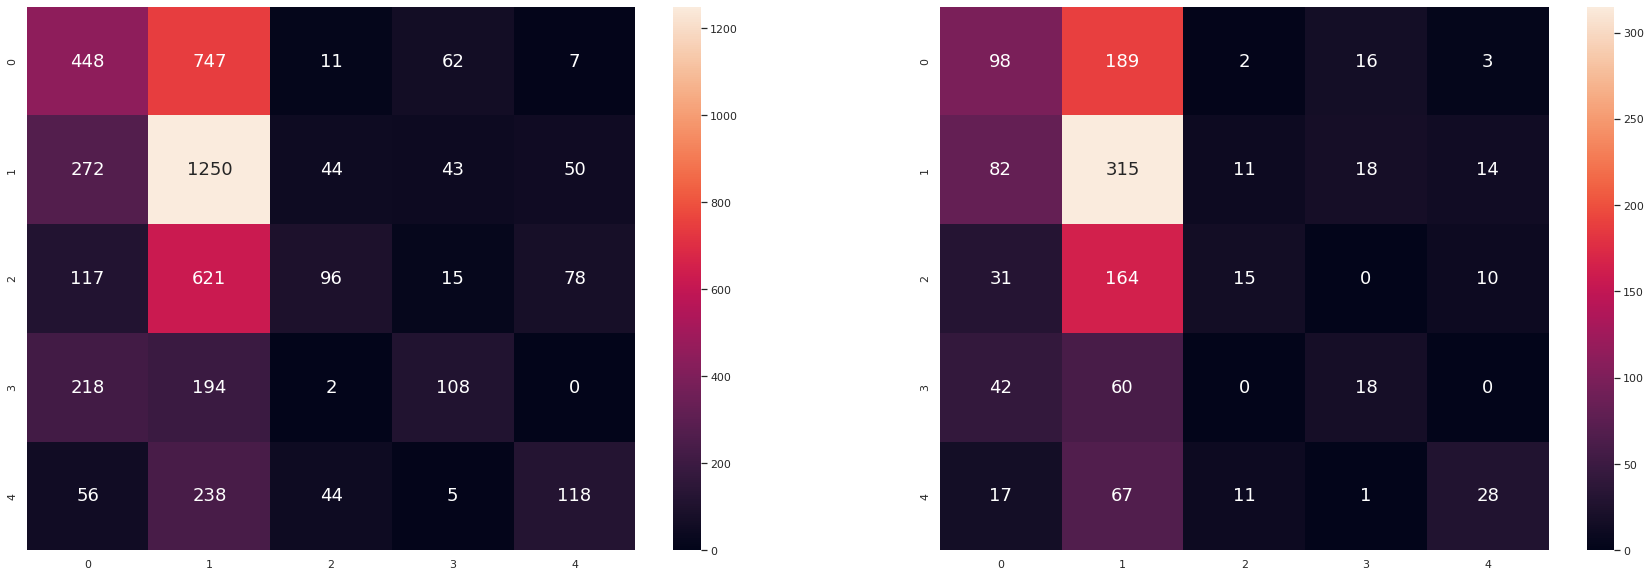

In [19]:
top_15_rating_train, top_15_rating_test, top_15_genres_train, top_15_genres_test = train_test_split(top_15_rating_tree, top_15_genres_tree, test_size = 0.2)

dectree_genres = DecisionTreeClassifier(max_depth = 6)
dectree_genres.fit(top_15_genres_train, top_15_rating_train)

top_15_rating_train_pred = dectree_genres.predict(top_15_genres_train)
top_15_rating_test_pred = dectree_genres.predict(top_15_genres_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree_genres.score(top_15_genres_train, top_15_rating_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree_genres.score(top_15_genres_test, top_15_rating_test))
print()

f, axes = plt.subplots(1, 2, figsize=(30, 10))
sb.heatmap(confusion_matrix(top_15_rating_train, top_15_rating_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(top_15_rating_test, top_15_rating_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [20]:
accuracy_train = [['Tags', dectree_genres.score(top_15_genres_train, top_15_rating_train)]]
accuracy_train_scores_genres = pd.DataFrame(accuracy_train, columns = ['Category', 'Accuracy Score'])
accuracy_train_scores_genres

,Category,Accuracy Score
0,Tags,0.417011


In [21]:
accuracy_test = [['Tags', dectree_genres.score(top_15_genres_test, top_15_rating_test)]]
accuracy_test_scores_genres = pd.DataFrame(accuracy_test, columns = ['Category', 'Accuracy Score'])
accuracy_test_scores_genres

,Category,Accuracy Score
0,Tags,0.391089


**Release Year**

In [22]:
filteredanime_data_releaseyear = filteredanime_data.copy()
filteredanime_data_releaseyear["Rating Category"] = pd.cut(x = filteredanime_data_releaseyear.Rating, bins = [0, 3, 3.3, 3.6, 4, 5], labels = ratings)
filteredanime_data_releaseyear = filteredanime_data_releaseyear[['Release_year', 'Rating Category']].copy()
filteredanime_data_releaseyear

,Release_year,Rating Category
0,2021.0,"Good (4, 5.0]"
1,2021.0,"Good (4, 5.0]"
2,2009.0,"Good (4, 5.0]"
3,2019.0,"Good (4, 5.0]"
4,2020.0,"Good (4, 5.0]"
...,...,...
6051,2020.0,"Poor (0, 3]"
6052,2014.0,"Poor (0, 3]"
6053,2016.0,"Poor (0, 3]"
6054,2015.0,"Poor (0, 3]"


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.37572254335260113

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.37706270627062705



<AxesSubplot:>

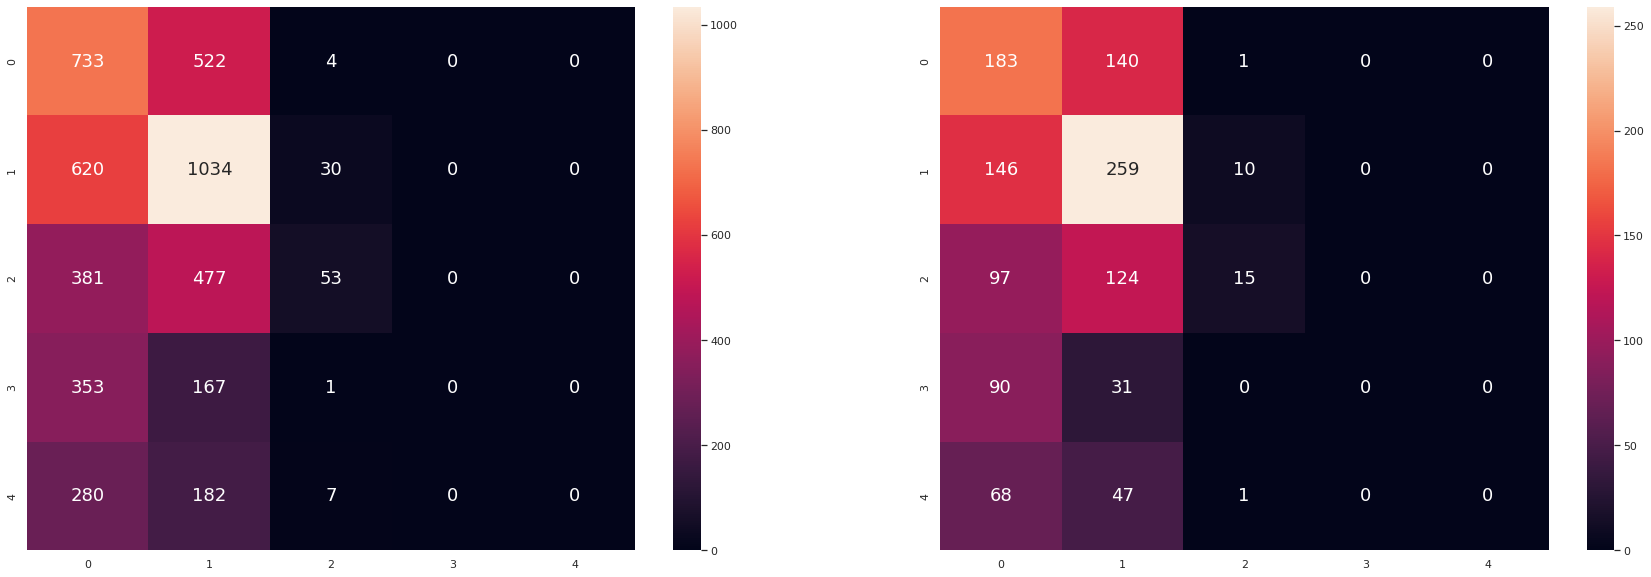

In [23]:
top_15_rating_tree = pd.DataFrame(filteredanime_data_releaseyear['Rating Category'])
top_15_releaseyear_tree = pd.DataFrame(filteredanime_data_releaseyear['Release_year'])
top_15_rating_train, top_15_rating_test, top_15_releaseyear_train, top_15_releaseyear_test = train_test_split(top_15_rating_tree, top_15_releaseyear_tree, test_size = 0.2)

dectree_releaseyear = DecisionTreeClassifier(max_depth = 6)  # create the decision tree object
dectree_releaseyear.fit(top_15_releaseyear_train, top_15_rating_train)                    # train the decision tree model

top_15_rating_train_pred = dectree_releaseyear.predict(top_15_releaseyear_train)
top_15_rating_test_pred = dectree_releaseyear.predict(top_15_releaseyear_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree_releaseyear.score(top_15_releaseyear_train, top_15_rating_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree_releaseyear.score(top_15_releaseyear_test, top_15_rating_test))
print()

f, axes = plt.subplots(1, 2, figsize=(30, 10))
sb.heatmap(confusion_matrix(top_15_rating_train, top_15_rating_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(top_15_rating_test, top_15_rating_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.498015873015873, 0.9285714285714286, 'Release_year <= 2004.0\ngini = 1.0\nsamples = 4844\nvalue = [1259, 1684, 911, 521, 469]\nclass = y[1]'),
 Text(0.26785714285714285, 0.7857142857142857, 'Release_year <= 1978.0\ngini = 1.0\nsamples = 1509\nvalue = [260, 729, 371, 45, 104]\nclass = y[1]'),
 Text(0.14682539682539683, 0.6428571428571429, 'Release_year <= 1974.0\ngini = 1.0\nsamples = 199\nvalue = [4, 94, 85, 0, 16]\nclass = y[1]'),
 Text(0.10317460317460317, 0.5, 'Release_year <= 1972.0\ngini = 1.0\nsamples = 128\nvalue = [4, 50, 63, 0, 11]\nclass = y[2]'),
 Text(0.06349206349206349, 0.35714285714285715, 'Release_year <= 1962.0\ngini = 1.0\nsamples = 101\nvalue = [3, 45, 45, 0, 8]\nclass = y[1]'),
 Text(0.031746031746031744, 0.21428571428571427, 'Release_year <= 1956.0\ngini = 1.0\nsamples = 10\nvalue = [0, 1, 5, 0, 4]\nclass = y[2]'),
 Text(0.015873015873015872, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 1, 1, 0, 0]\nclass = y[1]'),
 Text(0.047619047619047616, 

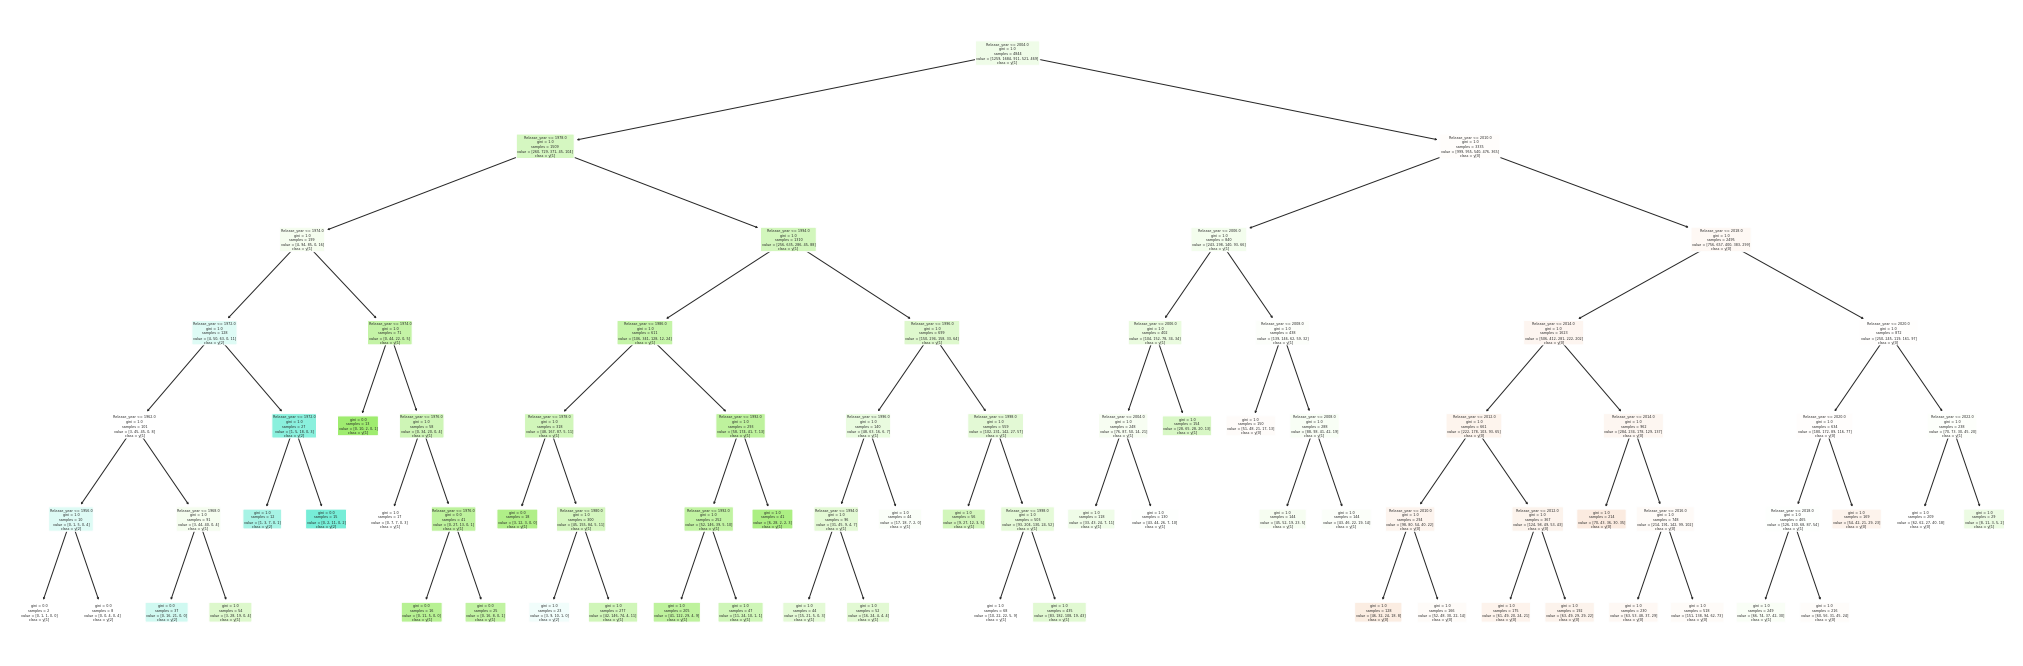

In [24]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,12))
#added precision to round off the number
plot_tree(dectree_releaseyear, filled=True, rounded=True,precision=0, 
          feature_names=["Release_year"],
          class_names=True)

In [25]:
accuracy_train = [['Release Year', dectree_releaseyear.score(top_15_releaseyear_train, top_15_rating_train)]]
accuracy_train_scores_releaseyear = pd.DataFrame(accuracy_train, columns = ['Category', 'Accuracy Score'])
accuracy_train_scores_releaseyear

,Category,Accuracy Score
0,Release Year,0.375723


In [26]:
accuracy_test = [['Release Year', dectree_releaseyear.score(top_15_releaseyear_test, top_15_rating_test)]]
accuracy_test_scores_releaseyear = pd.DataFrame(accuracy_test, columns = ['Category', 'Accuracy Score'])
accuracy_test_scores_releaseyear

,Category,Accuracy Score
0,Release Year,0.377063


In [27]:
accuracy_train_scores = [accuracy_train_scores_studios, accuracy_train_scores_genres, accuracy_train_scores_releaseyear]
accuracy_train_scores = pd.concat(accuracy_train_scores)
accuracy_train_scores

,Category,Accuracy Score
0,Studio,0.430189
0,Tags,0.417011
0,Release Year,0.375723


In [28]:
accuracy_test_scores = [accuracy_test_scores_studios, accuracy_test_scores_genres, accuracy_test_scores_releaseyear]
accuracy_test_scores = pd.concat(accuracy_test_scores)
accuracy_test_scores

,Category,Accuracy Score
0,Studio,0.364151
0,Tags,0.391089
0,Release Year,0.377063


[Text(0.5, 1.0, 'Accuracy Score difference among categories')]

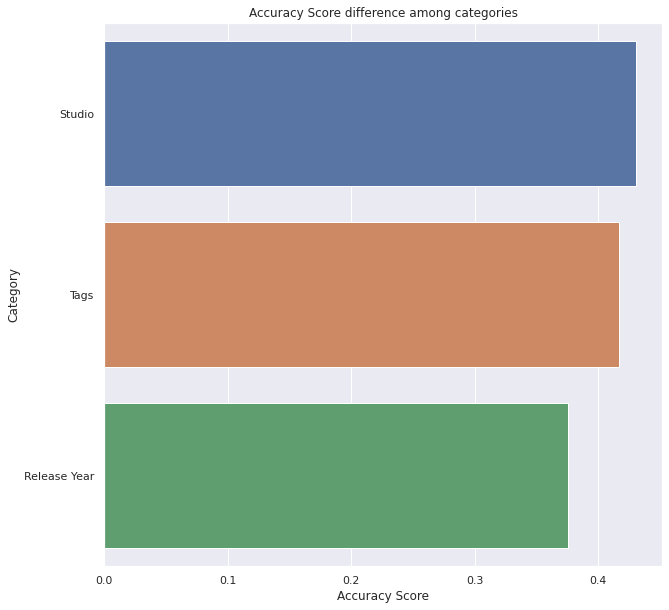

In [29]:
f,axes=plt.subplots(figsize=(10,10))
sb.barplot(data=accuracy_train_scores, y="Category", x="Accuracy Score").set(title='Accuracy Score difference among categories')

This is to illustrate the accuracy score of the 3 categories, we can see that release year has an obvious lower accuracy score as the other 2.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84741b16-0348-47d2-95b1-78d2d6dd8ad4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>